In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gdown

# File ID from your Google Drive shareable link
file_id = "1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg"

# Construct the URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output="myfile.xlsx", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /home/vivobook/Learning/ML/notebooks/Advanced-ML/TimeSeries-2/myfile.xlsx
100%|██████████| 13.7k/13.7k [00:00<00:00, 38.2MB/s]


'myfile.xlsx'

In [3]:
data = pd.read_excel("myfile.xlsx")
data

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
...,...,...
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0


In [4]:
#Setting  date as index
data.set_index("DATE" , inplace=True)
data

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


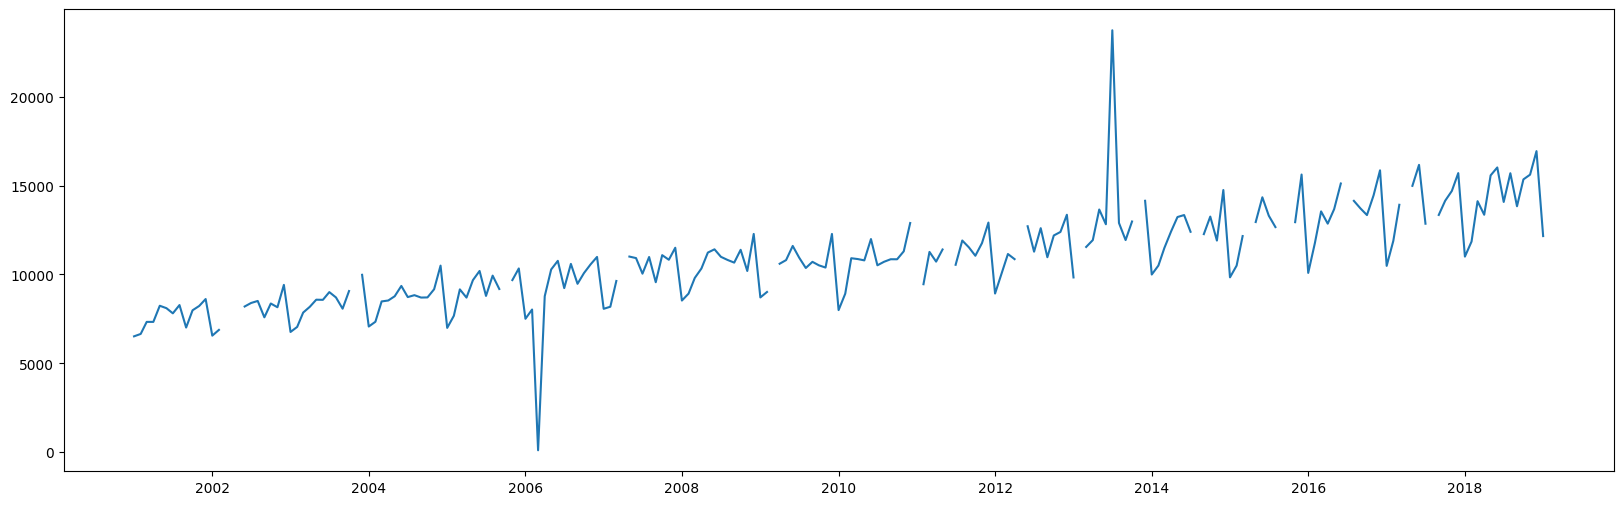

In [5]:
# lets plot the data
plt.rcParams['figure.figsize'] = (20 , 6)

plt.plot(data["Sales"])

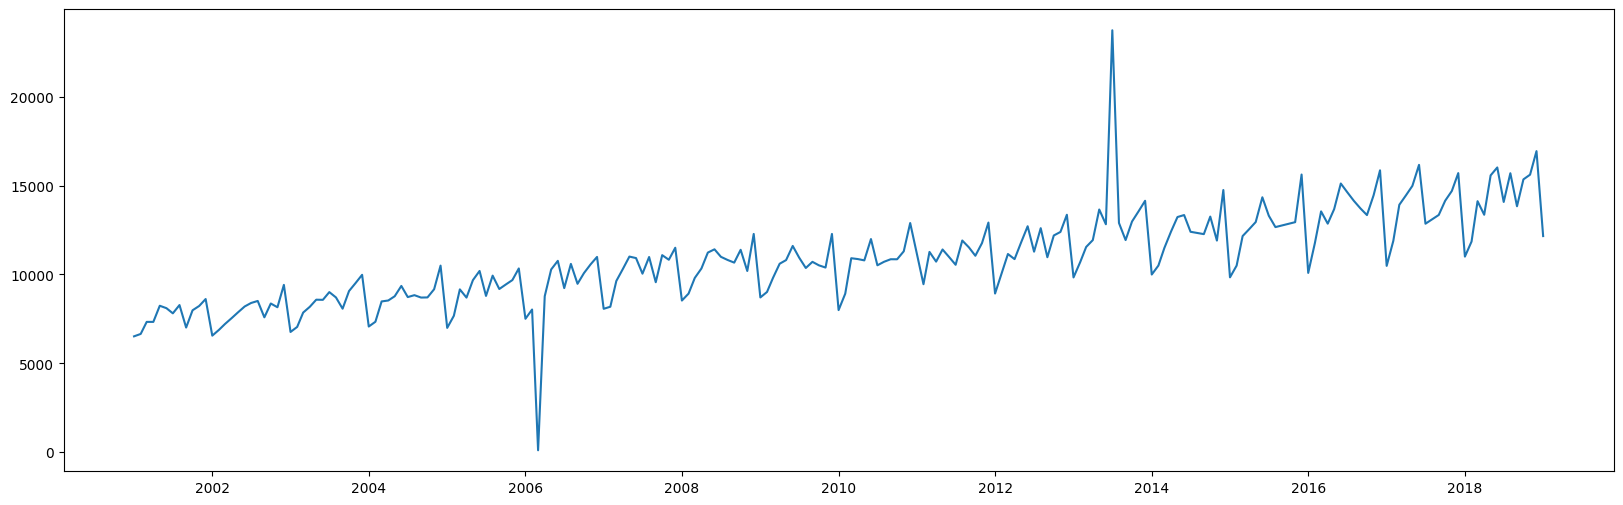

In [7]:
# linear interpolation to fix missing values
data["Sales"] = data["Sales"].interpolate(method="linear")
plt.plot(data["Sales"])

In [8]:
# we can clearly see some outliers , so lets remove then
up_value = data.Sales.quantile(0.95)
low_value = data.Sales.quantile(0.05)

print(up_value)
print(low_value)
data["Sales"] = data["Sales"].clip(upper=up_value , lower=low_value)

15164.599999999997
7307.8


<Axes: xlabel='DATE'>

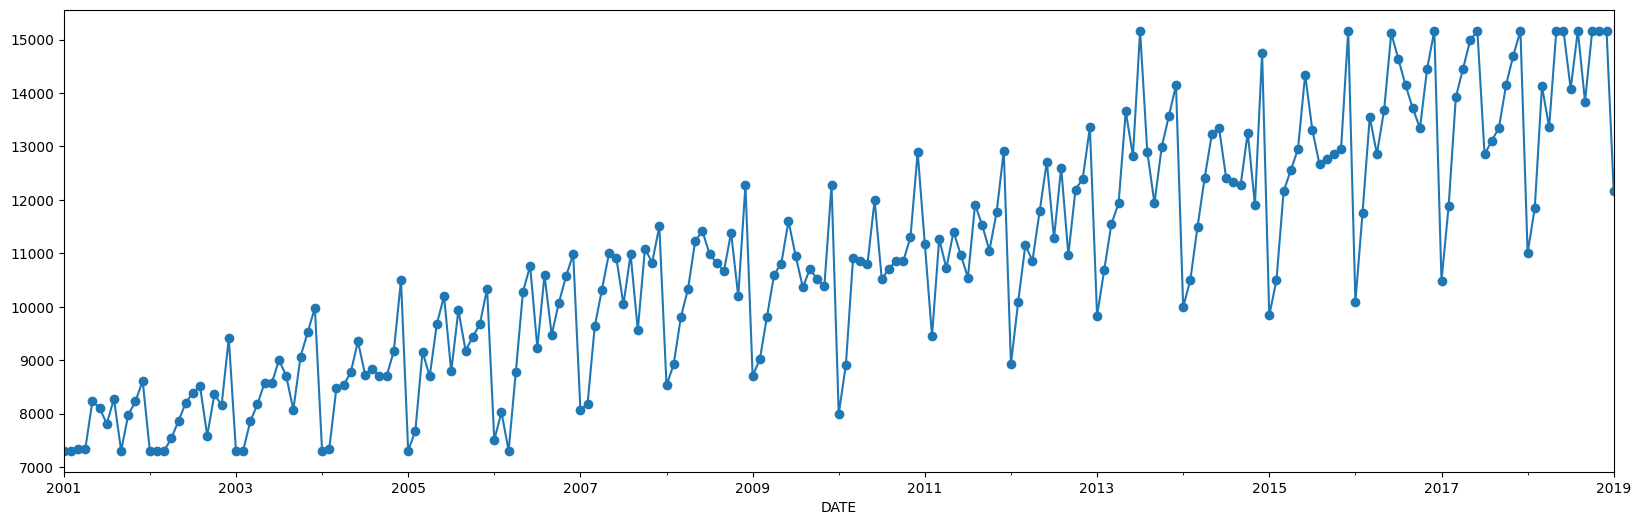

In [10]:
data.Sales.plot(style='-o', figsize=(20,6))

In [11]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [13]:

train_max_date = data.index[-12]
train_x = data.loc[data.index < data.index[-12]].copy()
test_x = data.loc[data.index >= data.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15164.6
2018-06-01,15164.6
2018-07-01,14080.0
2018-08-01,15164.6
2018-09-01,13838.0
2018-10-01,15164.6


In [14]:
df = data.copy()
df

,Sales
DATE,
2001-01-01,7307.8
2001-02-01,7307.8
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15164.6
2018-11-01,15164.6


In [16]:
pd.DataFrame(index=pd.date_range(start=df.index[-1] ,  periods=12 , freq='MS'))

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01


In [18]:
df = pd.concat([df, pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:])])

df.tail(20)

,Sales
2018-06-01,15164.6
2018-07-01,14080.0
2018-08-01,15164.6
2018-09-01,13838.0
2018-10-01,15164.6
2018-11-01,15164.6
2018-12-01,15164.6
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [19]:
df.Sales.tail(15)

2018-11-01    15164.6
2018-12-01    15164.6
2019-01-01    12160.0
2019-02-01        NaN
2019-03-01        NaN
2019-04-01        NaN
2019-05-01        NaN
2019-06-01        NaN
2019-07-01        NaN
2019-08-01        NaN
2019-09-01        NaN
2019-10-01        NaN
2019-11-01        NaN
2019-12-01        NaN
2020-01-01        NaN
Name: Sales, dtype: float64

In [20]:
# lets take all the na values in a variables called pred
pred = df.Sales.dropna().values

In [21]:
pred

array([ 7307.8       ,  7307.8       ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7307.8       ,  7985.        ,  8229.        ,  8618.        ,
        7307.8       ,  7307.8       ,  7307.8       ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        7307.8       ,  7307.8       ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7307.8       ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        7307.8       ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [22]:
for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([15164.6       , 14080.        , 15164.6       , 13838.        ,
       15164.6       , 15164.6       , 15164.6       , 12160.        ,
       14163.06666667, 13829.22222222, 13384.0962963 , 13792.12839506,
       13668.48230453, 13614.90233196, 13691.83767718, 13658.40743789,
       13655.04914901, 13668.43142136, 13660.62933609, 13661.36996882])

In [25]:
pred = pred.round(1)
pred

array([ 7307.8,  7307.8,  7332. ,  7332. ,  8240. ,  8104. ,  7813. ,
        8279. ,  7307.8,  7985. ,  8229. ,  8618. ,  7307.8,  7307.8,
        7307.8,  7540. ,  7869. ,  8198. ,  8396. ,  8510. ,  7589. ,
        8366. ,  8156. ,  9415. ,  7307.8,  7307.8,  7856. ,  8181. ,
        8581. ,  8573. ,  9008. ,  8708. ,  8074. ,  9068. ,  9524.5,
        9981. ,  7307.8,  7339. ,  8483. ,  8536. ,  8774. ,  9355. ,
        8728. ,  8835. ,  8701. ,  8709. ,  9170. , 10499. ,  7307.8,
        7675. ,  9161. ,  8699. ,  9682. , 10198. ,  8794. ,  9935. ,
        9182. ,  9433. ,  9684. , 10339. ,  7507. ,  8028. ,  7307.8,
        8777. , 10281. , 10767. ,  9233. , 10595. ,  9475. , 10077. ,
       10569. , 10987. ,  8068. ,  8185. ,  9634. , 10320.5, 11007. ,
       10922. , 10045. , 10983. ,  9564. , 11087. , 10828. , 11504. ,
        8533. ,  8923. ,  9804. , 10335. , 11232. , 11415. , 10993. ,
       10817. , 10667. , 11388. , 10196. , 12280. ,  8708. ,  9015. ,
        9809.5, 1060

<Axes: >

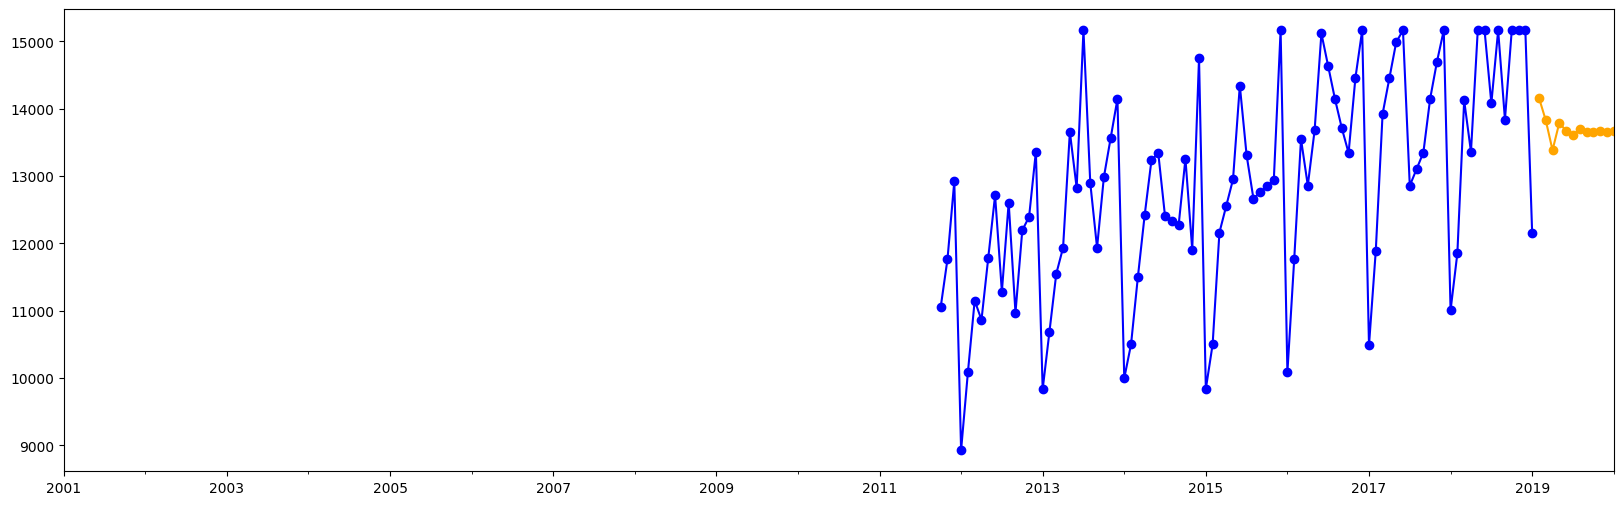

In [27]:
df['Pred'] = pred

df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.Pred.plot(style='-o', color= "orange")
df.Sales.tail(100).plot(style='-o', color= "blue")

In [28]:
df = train_x.copy()
df

,Sales
DATE,
2001-01-01,7307.8
2001-02-01,7307.8
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0


In [29]:
# actual data = text_x
# prdicted by moving average

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15164.6
2018-06-01,15164.6
2018-07-01,14080.0
2018-08-01,15164.6
2018-09-01,13838.0
2018-10-01,15164.6


In [30]:
starting_date = df.index[-1]
print(starting_date)


2018-01-01 00:00:00


In [41]:
nan_values = pd.DataFrame(index=pd.date_range(start=starting_date , periods=13 , freq="MS"))
nan_values

""
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01


In [42]:
nan_values = nan_values[1:]
nan_values

""
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01


In [45]:
df = pd.concat([df, nan_values])


In [47]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

MAE : 1575.682
RMSE : 1686.831
MAPE: 0.11


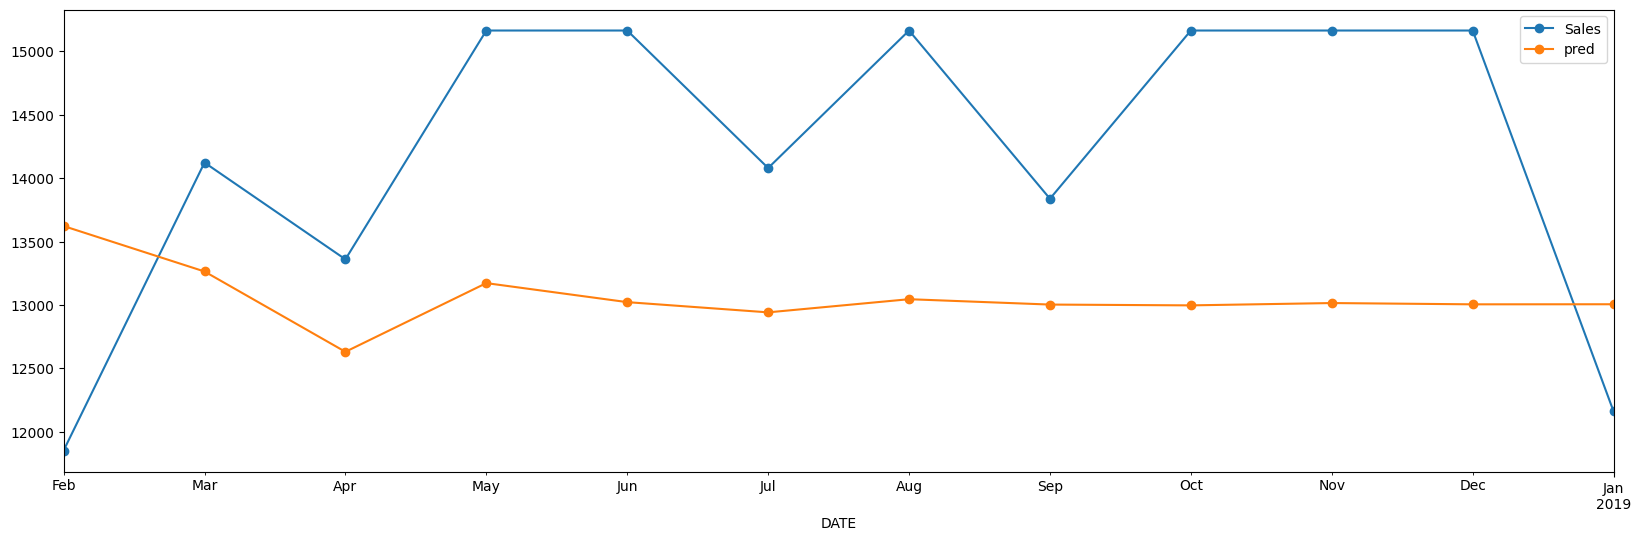

In [48]:
test_x['pred'] = pred[-12:]
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])